#Pre-processing data

##Load Dataset

In [1]:
!gdown "16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t"

Downloading...
From: https://drive.google.com/uc?id=16h_mWdWCsAQeO2cu_AccT1d1pW9WP60t
To: /content/data_ws.zip
100% 21.8M/21.8M [00:00<00:00, 98.8MB/s]


In [2]:
!unzip data_ws.zip

Archive:  data_ws.zip
   creating: data_ws/
  inflating: data_ws/ws_0.jpg        
  inflating: data_ws/ws_1.jpg        
  inflating: data_ws/ws_10.jpg       
  inflating: data_ws/ws_100.jpg      
  inflating: data_ws/ws_1000.jpg     
  inflating: data_ws/ws_1001.jpg     
  inflating: data_ws/ws_1002.jpg     
  inflating: data_ws/ws_1003.jpg     
  inflating: data_ws/ws_1004.jpg     
  inflating: data_ws/ws_1005.jpg     
  inflating: data_ws/ws_1006.jpg     
  inflating: data_ws/ws_1007.jpg     
  inflating: data_ws/ws_1008.jpg     
  inflating: data_ws/ws_1009.jpg     
  inflating: data_ws/ws_101.jpg      
  inflating: data_ws/ws_1010.jpg     
  inflating: data_ws/ws_1011.jpg     
  inflating: data_ws/ws_1012.jpg     
  inflating: data_ws/ws_1013.jpg     
  inflating: data_ws/ws_1014.jpg     
  inflating: data_ws/ws_1015.jpg     
  inflating: data_ws/ws_1016.jpg     
  inflating: data_ws/ws_1017.jpg     
  inflating: data_ws/ws_1018.jpg     
  inflating: data_ws/ws_1019.jpg     
  infl

(240, 426, 3)


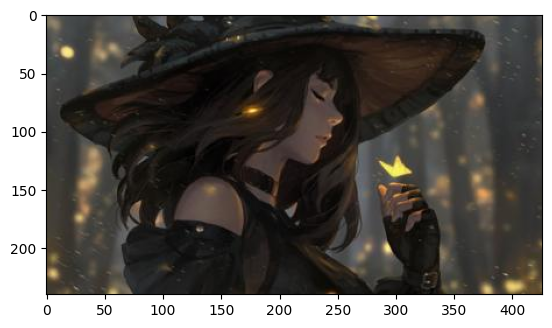

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data_ws/ws_0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

#Splitting dataset to train, test and val

In [4]:
import os
import random
import pandas as pd

# Path to your image folder
data_ws_dir = "/content/data_ws/"

# Get all image file paths
all_images = [os.path.join(data_ws_dir, filename) for filename in os.listdir(data_ws_dir)]

# Shuffle the paths randomly
random.shuffle(all_images)

# Split paths
train_data_ws = all_images[:967]
remaining_data_ws = all_images[967:]
test_data_ws = remaining_data_ws[:len(remaining_data_ws)//2]
val_data_ws = remaining_data_ws[len(remaining_data_ws)//2:]

print(f"Images have been randomly distributed: {len(train_data_ws)} to train, {len(test_data_ws)} to test, and {len(val_data_ws)} to val subfolders.")

Images have been randomly distributed: 967 to train, 121 to test, and 121 to val subfolders.


In [5]:
# Write to CSV files
train_df = pd.DataFrame({"image_path": train_data_ws})
test_df = pd.DataFrame({"image_path": test_data_ws})
val_df = pd.DataFrame({"image_path": val_data_ws})

train_df.to_csv("train.csv", index=False) # train_img.csv
test_df.to_csv("test.csv", index=False) # test_img.csv
val_df.to_csv("val.csv", index=False) #val_img.csv

In [6]:
train_df2list = train_df['image_path'].tolist()
test_df2list = test_df['image_path'].tolist()
val_df2list = val_df['image_path'].tolist()

In [7]:
train_df2list[:5]

['/content/data_ws/ws_1175.jpg',
 '/content/data_ws/ws_511.jpg',
 '/content/data_ws/ws_1087.jpg',
 '/content/data_ws/ws_500.jpg',
 '/content/data_ws/ws_457.jpg']

(240, 426, 3)


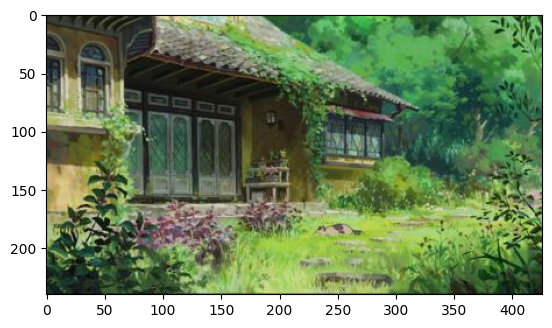

In [8]:
img = cv2.imread(train_df2list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

##Convert Images to numpy Array

In [9]:
from PIL import Image
import numpy as np

def image2array(csv_path, image_dir):
    """
    Load images from a CSV file containing image paths.

    Args:
        csv_path (str): Path to the CSV file with image paths.
        image_folder (str): Path to the folder containing the images.

    Returns:
        list of numpy.ndarray: List of image arrays.
    """
    image_paths_df = pd.read_csv(csv_path)
    image_paths = image_paths_df['image_path'].tolist()

    image_arrays = []
    for img_path in image_paths:
        img_full_path = os.path.join(image_dir, img_path)
        img = Image.open(img_full_path)
        img_array = np.array(img)
        image_arrays.append(img_array)

    return image_arrays

In [10]:
train_csv_path = 'train.csv'
test_csv_path = 'test.csv'
val_csv_path = 'val.csv'

image_dir_path = '/content/data_ws'

train_images_arr = image2array(train_csv_path, image_dir_path)
test_images_arr = image2array(test_csv_path, image_dir_path)
val_images_arr = image2array(val_csv_path, image_dir_path)

print(f"Converted {len(train_images_arr)} train images to array.")
print(f"Converted {len(test_images_arr)} test images to array.")
print(f"Converted {len(val_images_arr)} val images to array.")

Converted 967 train images to array.
Converted 121 test images to array.
Converted 121 val images to array.


In [20]:
len(train_images_arr)

967

array([[[ 51,  63,  75],
        [ 57,  69,  81],
        [ 65,  79,  92],
        ...,
        [110, 174, 220],
        [111, 175, 221],
        [111, 175, 221]],

       [[ 50,  62,  74],
        [ 56,  68,  80],
        [ 64,  78,  91],
        ...,
        [110, 174, 220],
        [111, 175, 221],
        [111, 175, 221]],

       [[ 49,  61,  73],
        [ 55,  67,  79],
        [ 63,  77,  90],
        ...,
        [110, 174, 220],
        [111, 175, 221],
        [111, 175, 221]],

       ...,

       [[166, 182, 182],
        [166, 182, 182],
        [166, 182, 182],
        ...,
        [ 36,  35,  40],
        [ 38,  37,  42],
        [ 38,  37,  42]],

       [[167, 181, 182],
        [167, 181, 182],
        [167, 181, 182],
        ...,
        [ 34,  33,  38],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       [[167, 181, 182],
        [167, 181, 182],
        [167, 181, 182],
        ...,
        [ 47,  46,  51],
        [ 31,  30,  35],
        [ 31,  30,  35]]], dtype=uint8)
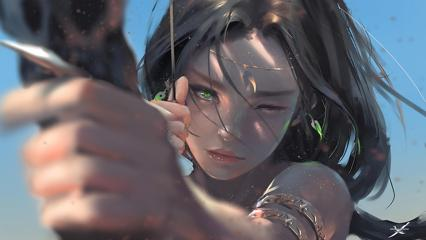

In [12]:
test_images_arr[0]

array([[[ 94,  84,  82],
        [101,  91,  89],
        [111, 101,  99],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]],

       [[ 94,  84,  82],
        [101,  91,  89],
        [111, 101,  99],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]],

       [[ 95,  85,  83],
        [102,  92,  90],
        [111, 101,  99],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]],

       ...,

       [[120,  88,  75],
        [126,  94,  81],
        [131, 102,  88],
        ...,
        [ 87,  54,  45],
        [ 89,  56,  47],
        [ 89,  56,  47]],

       [[120,  88,  75],
        [126,  94,  81],
        [131, 102,  88],
        ...,
        [ 87,  54,  45],
        [ 89,  56,  47],
        [ 89,  56,  47]],

       [[120,  88,  75],
        [126,  94,  81],
        [131, 102,  88],
        ...,
        [ 87,  54,  45],
        [ 88,  55,  46],
        [ 88,  55,  46]]], dtype=uint8)
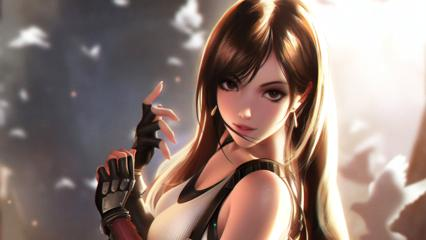

In [13]:
val_images_arr[0]

#Model Implementation

In [23]:
import tensorflow as tf
from keras.applications import VGG19, ResNet50
from keras.preprocessing.image import load_img, img_to_array

In [24]:
vgg19 = VGG19(weights='imagenet', include_top=False)
resnet50 = ResNet50(weights='imagenet', include_top=False)

In [25]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

input_image_path = test_df2list[0]
input_image = load_img(input_image_path, target_size=(240, 426))
input_array = img_to_array(input_image)
input_array = np.expand_dims(input_array, axis=0)

input_vgg19 = vgg19_preprocess_input(input_array)
input_resnet50 = resnet50_preprocess_input(input_array)

vgg19_feature = vgg19.predict(input_vgg19)
resnet50_feature = resnet50.predict(input_resnet50)

1/1 [==============================] - 1s 846ms/step


In [28]:
input_vgg19_flat = vgg19_feature.reshape(vgg19_feature.shape[0], -1)
input_resnet50_flat = resnet50_feature.reshape(resnet50_feature.shape[0], -1)

In [35]:
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(240, 426))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images(train_images_arr)

TypeError: path should be path-like or io.BytesIO, not <class 'numpy.ndarray'>

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

vgg19_similarity = cosine_similarity(input_vgg19_flat, train_images_arr.reshape(train_images_arr.shape[0], -1))
resnet50_similarity = cosine_similarity(input_resnet50_flat, train_images_arr.reshape(train_images_arr.shape[0], -1))

AttributeError: 'list' object has no attribute 'reshape'